# Plot Wavelength vs Flux for a Processed Spectrum

This notebook reads a processed spectra HDF5 file and plots wavelength vs flux for one spectrum.

In [1]:
# Import Required Libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read HDF5 File and inspect contents
h5_path = '../../data/processed_spectra.h5'
with h5py.File(h5_path, 'r') as f:
    print('Datasets:', list(f.keys()))
    print('flux_normalized shape:', f['flux_normalized'].shape)
    print('wavelength shape:', f['wavelength'].shape)

Datasets: ['continuum_fits', 'flux_normalized', 'original_parameter_names', 'original_stellar_parameters', 'wavelength']
flux_normalized shape: (971, 6487)
wavelength shape: (6487,)


In [3]:
# Extract Wavelength and Flux Data for one spectrum
spec_id = 10
with h5py.File(h5_path, 'r') as f:
    wavelength = f['wavelength'][:]
    flux = f['flux_normalized'][spec_id]  # Select a spectrum
    params = f['original_stellar_parameters'][spec_id]

print('Wavelength:', wavelength.shape)
print('Flux:', flux.shape)
print('Stellar Parameters:', params)

Wavelength: (6487,)
Flux: (6487,)
Stellar Parameters: [ 6.4e+03  3.0e+00 -3.9e+00  1.0e+00  0.0e+00  0.0e+00]


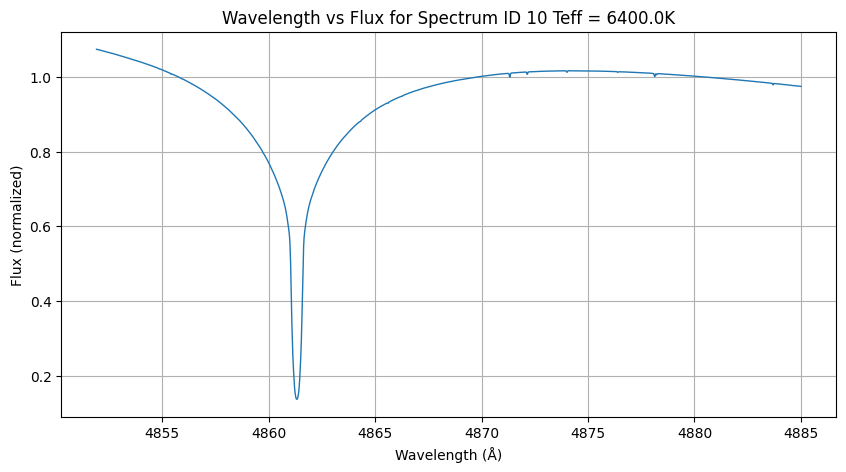

In [4]:
# Plot Wavelength vs Flux
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, lw=1)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (normalized)')
plt.title('Wavelength vs Flux for Spectrum ID {} Teff = {}K'.format(spec_id, params[0]))
plt.grid(True)
plt.show()